# Исследование объявлений о продаже квартир

Предоставленны данные сервиса Яндекс Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. 

Цель исследования — определить ключевые факторы, влияющие на стоимость квартир, и выявить закономерности формирования цены на рынке недвижимости.

рамках проекта необходимо:

- провести предобработку данных и обработать пропуски

- добавить новые признаки (цена за квадратный метр, категории этажей и др.)

- проанализировать распределения ключевых параметров

- исследовать влияние различных факторов на цену квартиры

- выявить основные закономерности рынка недвижимости



### Первичный анализ данных


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# настройки отображения данных

pd.set_option('display.max_columns', None)
pd.set_option('display.width', None) #отображение всех столбцов в таблицах

pd.set_option('display.float_format', lambda x: '%.2f' % x)  # отключаем экспоненциальный формат
np.set_printoptions(suppress=True)  # отключаем научную нотацию в numpy


try:
    data = pd.read_csv('/Users/ale/Documents/practicum/data/real_estate_data.csv',sep='\t')
except:
    data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')

In [8]:
data.head() #посмотрим первые пять строк 

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.00,108.00,2019-03-07T00:00:00,3,2.70,16.00,51.00,8,NaN,False,False,25.00,NaN,Санкт-Петербург,18863.00,16028.00,1.00,482.00,2.00,755.00,NaN
1,7,3350000.00,40.40,2018-12-04T00:00:00,1,NaN,11.00,18.60,1,NaN,False,False,11.00,2.00,посёлок Шушары,12817.00,18603.00,0.00,NaN,0.00,NaN,81.00
2,10,5196000.00,56.00,2015-08-20T00:00:00,2,NaN,5.00,34.30,4,NaN,False,False,8.30,0.00,Санкт-Петербург,21741.00,13933.00,1.00,90.00,2.00,574.00,558.00
3,0,64900000.00,159.00,2015-07-24T00:00:00,3,NaN,14.00,NaN,9,NaN,False,False,NaN,0.00,Санкт-Петербург,28098.00,6800.00,2.00,84.00,3.00,234.00,424.00
4,2,10000000.00,100.00,2018-06-19T00:00:00,2,3.03,14.00,32.00,13,NaN,False,False,41.00,NaN,Санкт-Петербург,31856.00,8098.00,2.00,112.00,1.00,48.00,121.00


In [9]:
data.info() #посмотрим информацию о таблице

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

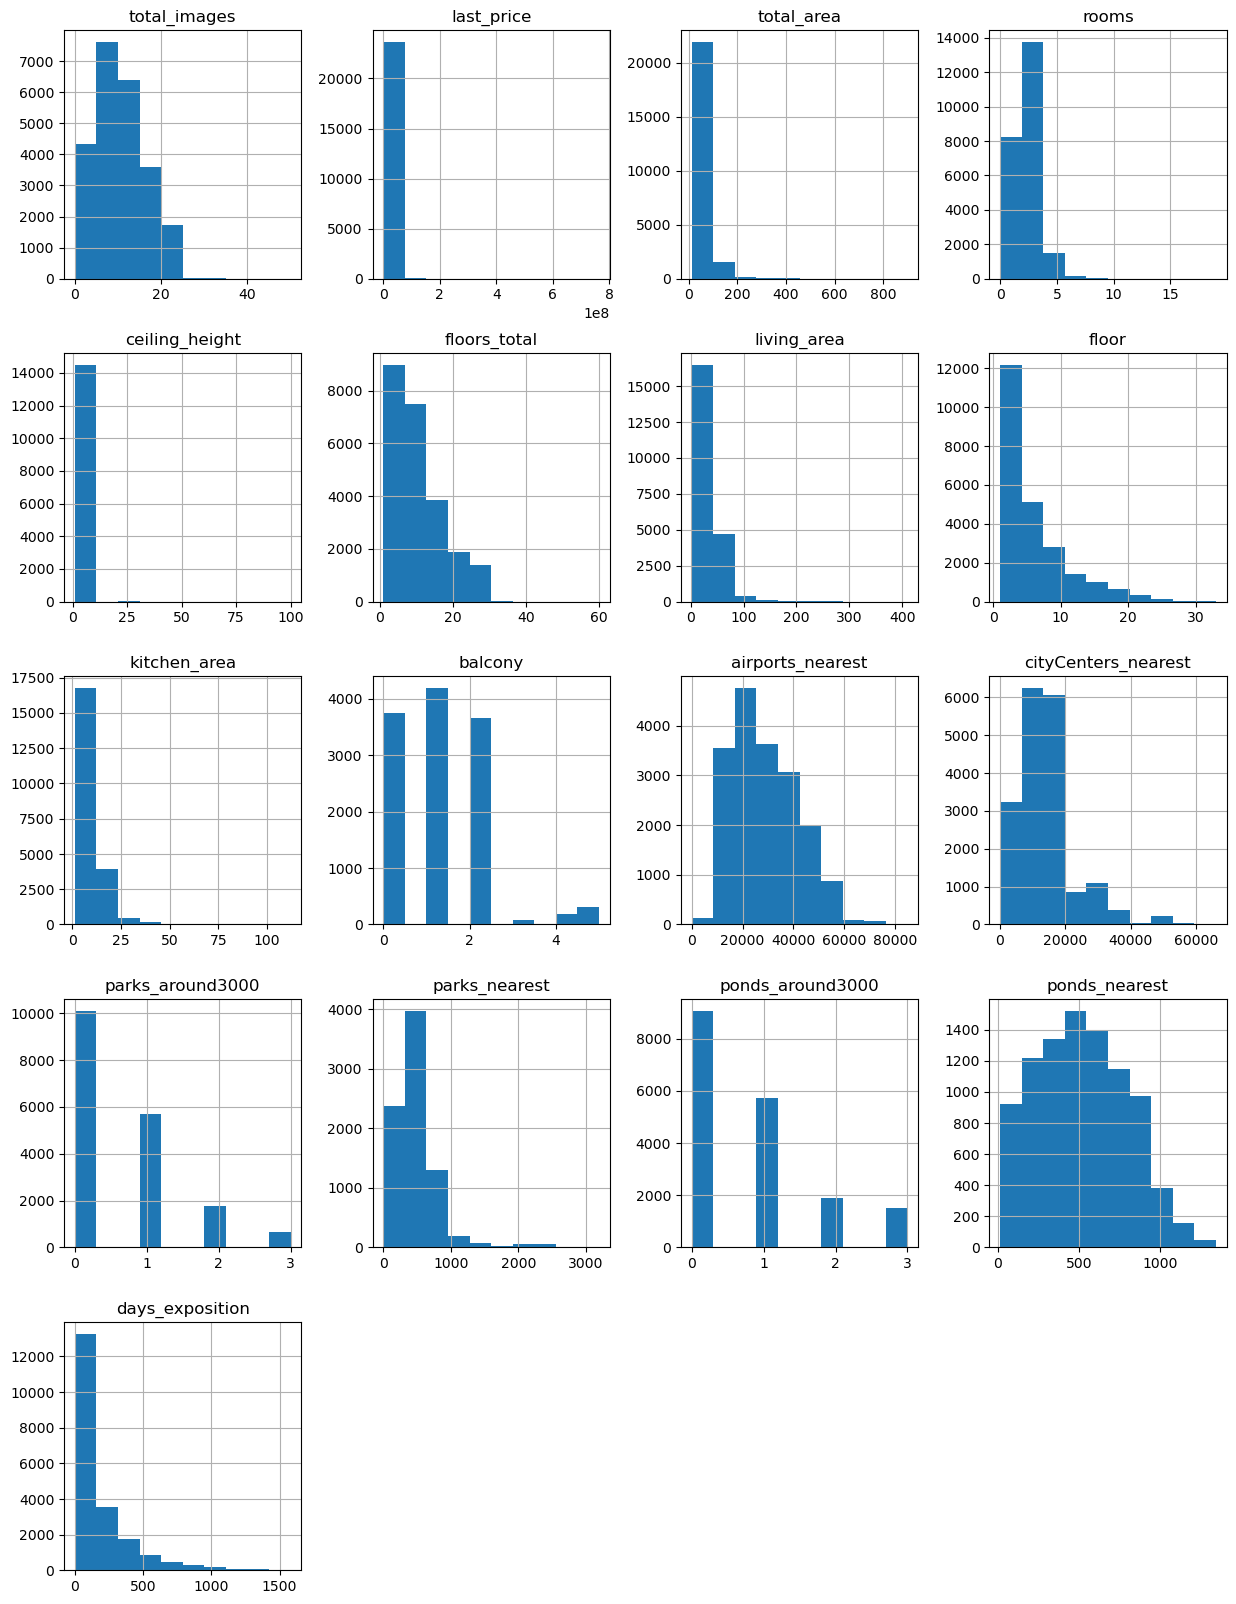

In [10]:
data.hist(figsize=(15,20)); #посотрим гистрограммы для всех числовых столбцов

Вывод:
Датасет содержит 23 699 строк, что является достаточным объёмом данных для проведения исследования. На этапе первичного анализа были выявлены следующие особенности:

столбец is_apartment имеет некорректный тип данных (не bool);

столбец first_day_exposition также требует приведения к корректному типу (дата/время);

в ряде столбцов присутствует значительное количество пропущенных значений.

Далее рассмотрим выявленные особенности более подробно.

### Предобработка данных

In [11]:
data.isna().sum() #посчитаем количество пропущенных значений в столбцах

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Вывод №2:

В данных наблюдается значительное количество пропущенных значений, в первую очередь в столбцах, связанных с расстояниями, а также количеством парков и водоёмов. Вероятно, эти значения рассчитываются автоматически, и их отсутствие может быть связано с некорректным вводом адресов (например, несоответствием шаблону), из-за чего система не смогла определить расстояния.

Также одной из возможных причин может быть отсутствие данных по новым районам, которые ещё не добавлены в базу.

Часть пропусков, вероятно, связана с тем, что информация не была указана продавцами. Эти случаи рассмотрим подробнее далее.

In [12]:
data['balcony'] = data['balcony'].fillna(0)  # заменяем пропущенные значения количества балконов на 0
data['balcony'].unique()  # проверяем уникальные значения, чтобы убедиться в отсутствии пропусков

array([0., 2., 1., 5., 4., 3.])

Вероятно, продавцы не указывали количество балконов из-за их отсутствия, поэтому пропущенные значения были заменены на 0.

In [13]:
data.query('open_plan == 1 or studio == 1').info() # выводим информацию о квартирах со свободной планировкой и студиях

<class 'pandas.core.frame.DataFrame'>
Index: 216 entries, 144 to 23637
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          216 non-null    int64  
 1   last_price            216 non-null    float64
 2   total_area            216 non-null    float64
 3   first_day_exposition  216 non-null    object 
 4   rooms                 216 non-null    int64  
 5   ceiling_height        92 non-null     float64
 6   floors_total          213 non-null    float64
 7   living_area           201 non-null    float64
 8   floor                 216 non-null    int64  
 9   is_apartment          22 non-null     object 
 10  studio                216 non-null    bool   
 11  open_plan             216 non-null    bool   
 12  kitchen_area          0 non-null      float64
 13  balcony               216 non-null    float64
 14  locality_name         216 non-null    object 
 15  airports_nearest      12

В данных видно, что у всех студий отсутствует информация о площади кухни, что объясняется объединением кухни с жилым пространством.

Аналогичная ситуация наблюдается у объектов со свободной планировкой: площадь кухни не указана, поскольку в таком типе недвижимости она не имеет чётко выделенной зоны.

In [14]:
# заменяем пропущенные значения площади кухни для студий и квартир со свободной планировкой на 0
data.loc[(data['studio'] == 1), 'kitchen_area'] = 0 
data.loc[(data['open_plan'] == 1), 'kitchen_area'] = 0

In [15]:
data['is_apartment'] = data['is_apartment'].astype('bool') # перевод столбца is_apartment в булевой тип

In [16]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
# перевели тип first_day_exposition в datetime

Рассмотрим уникальные значения столбца locality_name на наличие явных и неявных дубликатов

In [17]:
data['locality_name'].sort_values().unique()

array(['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск',
       'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар',
       'Красное Село', 'Кронштадт', 'Кудрово', 'Лодейное Поле',
       'Ломоносов', 'Луга', 'Любань', 'Мурино', 'Никольское',
       'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф', 'Пикалёво',
       'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин', 'Санкт-Петербург',
       'Светогорск', 'Сертолово', 'Сестрорецк', 'Сланцы', 'Сосновый Бор',
       'Сясьстрой', 'Тихвин', 'Тосно', 'Шлиссельбург',
       'городской поселок Большая Ижора', 'городской поселок Янино-1',
       'городской посёлок Будогощь', 'городской посёлок Виллози',
       'городской посёлок Лесогорский', 'городской посёлок Мга',
       'городской посёлок Назия', 'городской посёлок Новоселье',
       'городской посёлок Павлово', 'городской посёлок Рощино',
       'городской посёлок Свирьстрой', 'городской посёлок Совет

In [18]:
data['locality_name_clear'] = (
    data['locality_name']
    .str.replace('ё', 'е')
    .replace(
        ['городской поселок ', 'деревня ', 'коттеджный поселок ',
         'поселок ', 'городского типа ', 'садоводческое некоммерческое товарищество ',
         'садовое товарищество ', 'село '],
        '',
        regex=True
    )  # оставляем только названия населённых пунктов в новом столбце
)

len(data['locality_name_clear'].unique())  # количество уникальных населённых пунктов

309

Удалим строки с пропущенными значениями в столбце locality_name, так как отсутствие информации о населённом пункте делает дальнейший анализ некорректным.

In [19]:
data = data.dropna(subset=['locality_name'])  # удаляем строки с пропущенными значениями в столбце locality_name
data.info()  # оцениваем результаты первого этапа предобработки данных

<class 'pandas.core.frame.DataFrame'>
Index: 23650 entries, 0 to 23698
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23650 non-null  int64         
 1   last_price            23650 non-null  float64       
 2   total_area            23650 non-null  float64       
 3   first_day_exposition  23650 non-null  datetime64[ns]
 4   rooms                 23650 non-null  int64         
 5   ceiling_height        14490 non-null  float64       
 6   floors_total          23565 non-null  float64       
 7   living_area           21752 non-null  float64       
 8   floor                 23650 non-null  int64         
 9   is_apartment          23650 non-null  bool          
 10  studio                23650 non-null  bool          
 11  open_plan             23650 non-null  bool          
 12  kitchen_area          21597 non-null  float64       
 13  balcony              

In [20]:
data['rooms'].unique()

array([ 3,  1,  2,  4,  5,  6,  0,  7, 11,  8, 14, 10, 15,  9, 19, 16, 12])

Проверив уникальные значения количества комнат, обнаружено, что в данных присутствуют квартиры с нулевым количеством комнат. Такая информация некорректна и может искажать результаты анализа, поскольку даже студия предполагает наличие как минимум одной комнаты. В связи с этим значения с 0 комнат будут заменены на 1.

In [21]:
display(len(data.query('rooms == 0')))


197

In [22]:
data['rooms'] = data['rooms'].replace(0, 1)
display(len(data.query('rooms == 0')))

0

При анализе распределения количества комнат было замечено наличие квартир с числом комнат более 7. Такие значения выглядят нетипично для массового рынка недвижимости и могут относиться к редким или аномальным объектам.

В связи с этим дополнительно проверим, сколько подобных наблюдений содержится в данных.

In [66]:
len(data.query('rooms > 7'))

30

В данных присутствуют квартиры с количеством комнат более 7, однако таких объектов крайне мало (около 30 записей).

Подобные значения могут относиться к нестандартной недвижимости (например, коммунальные квартиры или элитные объекты) и искажать результаты анализа.

В связи с этим такие наблюдения были исключены из дальнейшего исследования.

In [68]:
# удаляем квартиры с количеством комнат более 7 (редкие и аномальные значения)
data = data[data['rooms'] <= 7]

### Создание новых признаков

In [69]:
data['metr_price'] = (data['last_price'] / data['total_area']).round(2)  # рассчитываем цену за квадратный метр
display(data.head()) 

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,locality_name_clear,metr_price,day,month,year,floor_common,citycenter_km,parks_km,ponds_km,kitchenliving,ceiling_height_new,categorize_price,city_center_km
0,20,13000000.00,108.00,2019-03-07,3,2.70,16.00,51.00,8,True,False,False,25.00,0.00,Санкт-Петербург,18863.00,16028.00,1.00,482.00,2.00,755.00,NaN,Санкт-Петербург,120370.37,3,3,2019,другой,16.00,0.48,1.00,False,2.70,premium,16.03
1,7,3350000.00,40.40,2018-12-04,1,NaN,11.00,18.60,1,True,False,False,11.00,2.00,посёлок Шушары,12817.00,18603.00,0.00,NaN,0.00,NaN,81.00,Шушары,82920.79,1,12,2018,первый,19.00,NaN,NaN,False,2.65,standard,18.60
2,10,5196000.00,56.00,2015-08-20,2,NaN,5.00,34.30,4,True,False,False,8.30,0.00,Санкт-Петербург,21741.00,13933.00,1.00,90.00,2.00,574.00,558.00,Санкт-Петербург,92785.71,3,8,2015,другой,14.00,0.09,1.00,False,2.65,standard,13.93
3,0,64900000.00,159.00,2015-07-24,3,NaN,14.00,NaN,9,True,False,False,NaN,0.00,Санкт-Петербург,28098.00,6800.00,2.00,84.00,3.00,234.00,424.00,Санкт-Петербург,408176.10,4,7,2015,другой,7.00,0.08,0.00,False,2.65,luxury,6.80
4,2,10000000.00,100.00,2018-06-19,2,3.03,14.00,32.00,13,True,False,False,41.00,0.00,Санкт-Петербург,31856.00,8098.00,2.00,112.00,1.00,48.00,121.00,Санкт-Петербург,100000.00,1,6,2018,другой,8.00,0.11,0.00,False,3.03,standard,8.10


In [70]:
# добавляем столбцы с декомпозированной датой публикации объявления
data['day'] = pd.DatetimeIndex(data['first_day_exposition']).weekday
data['month'] = pd.DatetimeIndex(data['first_day_exposition']).month
data['year'] = pd.DatetimeIndex(data['first_day_exposition']).year

data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,locality_name_clear,metr_price,day,month,year,floor_common,citycenter_km,parks_km,ponds_km,kitchenliving,ceiling_height_new,categorize_price,city_center_km
0,20,13000000.00,108.00,2019-03-07,3,2.70,16.00,51.00,8,True,False,False,25.00,0.00,Санкт-Петербург,18863.00,16028.00,1.00,482.00,2.00,755.00,NaN,Санкт-Петербург,120370.37,3,3,2019,другой,16.00,0.48,1.00,False,2.70,premium,16.03
1,7,3350000.00,40.40,2018-12-04,1,NaN,11.00,18.60,1,True,False,False,11.00,2.00,посёлок Шушары,12817.00,18603.00,0.00,NaN,0.00,NaN,81.00,Шушары,82920.79,1,12,2018,первый,19.00,NaN,NaN,False,2.65,standard,18.60
2,10,5196000.00,56.00,2015-08-20,2,NaN,5.00,34.30,4,True,False,False,8.30,0.00,Санкт-Петербург,21741.00,13933.00,1.00,90.00,2.00,574.00,558.00,Санкт-Петербург,92785.71,3,8,2015,другой,14.00,0.09,1.00,False,2.65,standard,13.93
3,0,64900000.00,159.00,2015-07-24,3,NaN,14.00,NaN,9,True,False,False,NaN,0.00,Санкт-Петербург,28098.00,6800.00,2.00,84.00,3.00,234.00,424.00,Санкт-Петербург,408176.10,4,7,2015,другой,7.00,0.08,0.00,False,2.65,luxury,6.80
4,2,10000000.00,100.00,2018-06-19,2,3.03,14.00,32.00,13,True,False,False,41.00,0.00,Санкт-Петербург,31856.00,8098.00,2.00,112.00,1.00,48.00,121.00,Санкт-Петербург,100000.00,1,6,2018,другой,8.00,0.11,0.00,False,3.03,standard,8.10


In [71]:
# добавляем столбец с категорией этажа: первый, последний или другой
def floor_common(row):
    floor = row['floor']
    floors_total = row['floors_total']
    
    try:
        if floor == 1:
            return 'первый'
        elif floor == floors_total:
            return 'последний'
        else:
            return 'другой'
    except:
        return 'другой'

# В рамках учебного проекта используем apply + функцию.
# оптимельнее применить векторизацию

In [72]:
data['floor_common'] = data.apply(floor_common, axis=1)
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,locality_name_clear,metr_price,day,month,year,floor_common,citycenter_km,parks_km,ponds_km,kitchenliving,ceiling_height_new,categorize_price,city_center_km
0,20,13000000.00,108.00,2019-03-07,3,2.70,16.00,51.00,8,True,False,False,25.00,0.00,Санкт-Петербург,18863.00,16028.00,1.00,482.00,2.00,755.00,NaN,Санкт-Петербург,120370.37,3,3,2019,другой,16.00,0.48,1.00,False,2.70,premium,16.03
1,7,3350000.00,40.40,2018-12-04,1,NaN,11.00,18.60,1,True,False,False,11.00,2.00,посёлок Шушары,12817.00,18603.00,0.00,NaN,0.00,NaN,81.00,Шушары,82920.79,1,12,2018,первый,19.00,NaN,NaN,False,2.65,standard,18.60
2,10,5196000.00,56.00,2015-08-20,2,NaN,5.00,34.30,4,True,False,False,8.30,0.00,Санкт-Петербург,21741.00,13933.00,1.00,90.00,2.00,574.00,558.00,Санкт-Петербург,92785.71,3,8,2015,другой,14.00,0.09,1.00,False,2.65,standard,13.93
3,0,64900000.00,159.00,2015-07-24,3,NaN,14.00,NaN,9,True,False,False,NaN,0.00,Санкт-Петербург,28098.00,6800.00,2.00,84.00,3.00,234.00,424.00,Санкт-Петербург,408176.10,4,7,2015,другой,7.00,0.08,0.00,False,2.65,luxury,6.80
4,2,10000000.00,100.00,2018-06-19,2,3.03,14.00,32.00,13,True,False,False,41.00,0.00,Санкт-Петербург,31856.00,8098.00,2.00,112.00,1.00,48.00,121.00,Санкт-Петербург,100000.00,1,6,2018,другой,8.00,0.11,0.00,False,3.03,standard,8.10
5,10,2890000.00,30.40,2018-09-10,1,NaN,12.00,14.40,5,True,False,False,9.10,0.00,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.00,Янино-1,95065.79,0,9,2018,другой,NaN,NaN,NaN,False,2.65,standard,NaN
6,6,3700000.00,37.30,2017-11-02,1,NaN,26.00,10.60,6,True,False,False,14.40,1.00,посёлок Парголово,52996.00,19143.00,0.00,NaN,0.00,NaN,155.00,Парголово,99195.71,3,11,2017,другой,19.00,NaN,NaN,False,2.65,standard,19.14
7,5,7915000.00,71.60,2019-04-18,2,NaN,24.00,NaN,22,True,False,False,18.90,2.00,Санкт-Петербург,23982.00,11634.00,0.00,NaN,0.00,NaN,NaN,Санкт-Петербург,110544.69,3,4,2019,другой,12.00,NaN,NaN,False,2.65,standard,11.63
8,20,2900000.00,33.16,2018-05-23,1,NaN,27.00,15.43,26,True,False,False,8.81,0.00,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.00,Мурино,87454.76,2,5,2018,другой,NaN,NaN,NaN,False,2.65,standard,NaN
9,18,5400000.00,61.00,2017-02-26,3,2.50,9.00,43.60,7,True,False,False,6.50,2.00,Санкт-Петербург,50898.00,15008.00,0.00,NaN,0.00,NaN,289.00,Санкт-Петербург,88524.59,6,2,2017,другой,15.00,NaN,NaN,False,2.50,standard,15.01


In [73]:
# переводим расстояния в километры и округляем значения
data['citycenter_km'] = (data['cityCenters_nearest'] / 1000).round()
data['parks_km'] = (data['parks_nearest'] / 1000).round()
data['ponds_km'] = (data['ponds_nearest'] / 1000).round()

data.head(49)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,locality_name_clear,metr_price,day,month,year,floor_common,citycenter_km,parks_km,ponds_km,kitchenliving,ceiling_height_new,categorize_price,city_center_km
0,20,13000000.00,108.00,2019-03-07,3,2.70,16.00,51.00,8,True,False,False,25.00,0.00,Санкт-Петербург,18863.00,16028.00,1.00,482.00,2.00,755.00,NaN,Санкт-Петербург,120370.37,3,3,2019,другой,16.00,0.00,1.00,False,2.70,premium,16.03
1,7,3350000.00,40.40,2018-12-04,1,NaN,11.00,18.60,1,True,False,False,11.00,2.00,посёлок Шушары,12817.00,18603.00,0.00,NaN,0.00,NaN,81.00,Шушары,82920.79,1,12,2018,первый,19.00,NaN,NaN,False,2.65,standard,18.60
2,10,5196000.00,56.00,2015-08-20,2,NaN,5.00,34.30,4,True,False,False,8.30,0.00,Санкт-Петербург,21741.00,13933.00,1.00,90.00,2.00,574.00,558.00,Санкт-Петербург,92785.71,3,8,2015,другой,14.00,0.00,1.00,False,2.65,standard,13.93
3,0,64900000.00,159.00,2015-07-24,3,NaN,14.00,NaN,9,True,False,False,NaN,0.00,Санкт-Петербург,28098.00,6800.00,2.00,84.00,3.00,234.00,424.00,Санкт-Петербург,408176.10,4,7,2015,другой,7.00,0.00,0.00,False,2.65,luxury,6.80
4,2,10000000.00,100.00,2018-06-19,2,3.03,14.00,32.00,13,True,False,False,41.00,0.00,Санкт-Петербург,31856.00,8098.00,2.00,112.00,1.00,48.00,121.00,Санкт-Петербург,100000.00,1,6,2018,другой,8.00,0.00,0.00,False,3.03,standard,8.10
5,10,2890000.00,30.40,2018-09-10,1,NaN,12.00,14.40,5,True,False,False,9.10,0.00,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.00,Янино-1,95065.79,0,9,2018,другой,NaN,NaN,NaN,False,2.65,standard,NaN
6,6,3700000.00,37.30,2017-11-02,1,NaN,26.00,10.60,6,True,False,False,14.40,1.00,посёлок Парголово,52996.00,19143.00,0.00,NaN,0.00,NaN,155.00,Парголово,99195.71,3,11,2017,другой,19.00,NaN,NaN,False,2.65,standard,19.14
7,5,7915000.00,71.60,2019-04-18,2,NaN,24.00,NaN,22,True,False,False,18.90,2.00,Санкт-Петербург,23982.00,11634.00,0.00,NaN,0.00,NaN,NaN,Санкт-Петербург,110544.69,3,4,2019,другой,12.00,NaN,NaN,False,2.65,standard,11.63
8,20,2900000.00,33.16,2018-05-23,1,NaN,27.00,15.43,26,True,False,False,8.81,0.00,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.00,Мурино,87454.76,2,5,2018,другой,NaN,NaN,NaN,False,2.65,standard,NaN
9,18,5400000.00,61.00,2017-02-26,3,2.50,9.00,43.60,7,True,False,False,6.50,2.00,Санкт-Петербург,50898.00,15008.00,0.00,NaN,0.00,NaN,289.00,Санкт-Петербург,88524.59,6,2,2017,другой,15.00,NaN,NaN,False,2.50,standard,15.01


проверим, что общая площадь квартиры не меньше суммы жилой площади и площади кухни;
учтём возможную погрешность (например, из-за округления при вводе данных)

In [74]:
data.query('total_area + 2 <= (living_area + kitchen_area)')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,locality_name_clear,metr_price,day,month,year,floor_common,citycenter_km,parks_km,ponds_km,kitchenliving,ceiling_height_new,categorize_price,city_center_km


In [75]:
data['kitchenliving'] = data['total_area'] <= (data['living_area'] + data['kitchen_area'] - 2)
data = data.query('kitchenliving != True')

аких записей немного, однако некорректные значения площади могут искажать расчёт цены за квадратный метр. В связи с этим исключим данные наблюдения из анализа.

### Исследовательский анализ данных

Рассмотрим значения высоты потолков в квартирах.

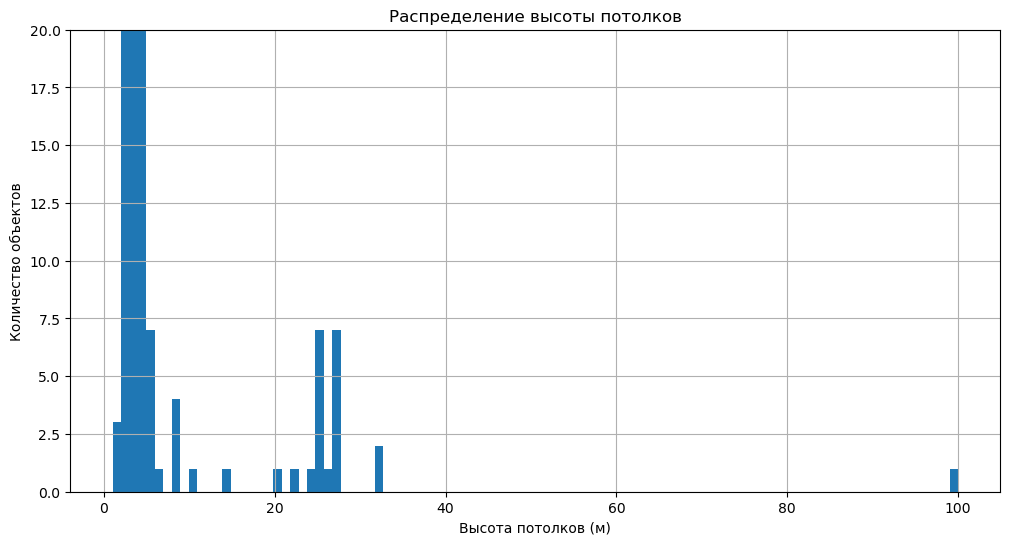

In [76]:
data['ceiling_height'].plot(
    kind='hist',
    bins=100,
    figsize=(12, 6),
    grid=True
)

plt.ylim(0, 20)
plt.xlabel('Высота потолков (м)')
plt.ylabel('Количество объектов')
plt.title('Распределение высоты потолков')

plt.show()


В данных наблюдается значительное количество значений высоты потолков, превышающих 10 метров, включая аномальные значения до 100 метров. Вероятно, часть данных указана в сантиметрах вместо метров. Ниже выполним корректировку этих значений.

In [77]:
data['ceiling_height'].median()

2.65

In [78]:
def normalize_height(row):
    height = row['ceiling_height']
    
    if height >= 10:
        return height / 10
    else:
        return height

In [79]:
data['ceiling_height_new'] = data.apply(normalize_height, axis=1)
data['ceiling_height_new'].unique() 


array([ 2.7 ,   nan,  3.03,  2.5 ,  2.67,  2.56,  3.05,  2.75,  2.6 ,
        2.9 ,  2.8 ,  2.55,  3.  ,  2.65,  3.2 ,  2.61,  3.25,  3.45,
        2.77,  2.85,  2.64,  2.57,  4.15,  3.5 ,  3.3 ,  2.71,  4.  ,
        2.47,  2.73,  2.84,  3.1 ,  2.34,  3.4 ,  3.06,  2.72,  2.54,
        2.51,  2.78,  2.76,  2.58,  3.7 ,  2.52,  5.2 ,  2.87,  2.66,
        2.59,  2.  ,  2.45,  3.6 ,  2.92,  3.11,  3.13,  3.8 ,  3.15,
        3.55,  3.62,  3.12,  2.53,  2.74,  2.96,  2.46,  5.3 ,  5.  ,
        2.79,  2.95,  4.06,  2.94,  3.82,  3.54,  3.53,  2.83,  4.7 ,
        2.4 ,  3.38,  3.01,  5.6 ,  3.65,  3.9 ,  3.18,  3.35,  2.3 ,
        3.57,  2.48,  2.62,  2.82,  3.98,  2.63,  3.83,  3.52,  3.95,
        3.75,  2.88,  3.67,  3.87,  3.66,  3.85,  3.86,  4.19,  3.24,
        4.8 ,  4.5 ,  4.2 ,  3.36,  3.08,  3.68,  3.07,  3.37,  3.09,
        8.  ,  3.16,  3.26,  3.34,  2.81,  3.44,  2.97,  4.37,  3.22,
        3.27,  4.1 ,  2.68,  2.93,  3.46,  3.47,  3.33,  3.63,  3.14,
        3.32,  1.2 ,

In [80]:
# заполняем пропущенные значения медианным значением высоты потолков
data['ceiling_height_new'] = data['ceiling_height_new'].fillna(data['ceiling_height_new'].median())

# заменяем аномально низкие значения (≤ 2 м) на медиану
data.loc[(data['ceiling_height'] <= 2), 'ceiling_height_new'] = data['ceiling_height_new'].median()

# проверяем уникальные значения после обработки
data['ceiling_height_new'].unique()

array([ 2.7 ,  2.65,  3.03,  2.5 ,  2.67,  2.56,  3.05,  2.75,  2.6 ,
        2.9 ,  2.8 ,  2.55,  3.  ,  3.2 ,  2.61,  3.25,  3.45,  2.77,
        2.85,  2.64,  2.57,  4.15,  3.5 ,  3.3 ,  2.71,  4.  ,  2.47,
        2.73,  2.84,  3.1 ,  2.34,  3.4 ,  3.06,  2.72,  2.54,  2.51,
        2.78,  2.76,  2.58,  3.7 ,  2.52,  5.2 ,  2.87,  2.66,  2.59,
        2.45,  3.6 ,  2.92,  3.11,  3.13,  3.8 ,  3.15,  3.55,  3.62,
        3.12,  2.53,  2.74,  2.96,  2.46,  5.3 ,  5.  ,  2.79,  2.95,
        4.06,  2.94,  3.82,  3.54,  3.53,  2.83,  4.7 ,  2.4 ,  3.38,
        3.01,  5.6 ,  3.65,  3.9 ,  3.18,  3.35,  2.3 ,  3.57,  2.48,
        2.62,  2.82,  3.98,  2.63,  3.83,  3.52,  3.95,  3.75,  2.88,
        3.67,  3.87,  3.66,  3.85,  3.86,  4.19,  3.24,  4.8 ,  4.5 ,
        4.2 ,  3.36,  3.08,  3.68,  3.07,  3.37,  3.09,  8.  ,  3.16,
        3.26,  3.34,  2.81,  3.44,  2.97,  4.37,  3.22,  3.27,  4.1 ,
        2.68,  2.93,  3.46,  3.47,  3.33,  3.63,  3.14,  3.32,  8.3 ,
        2.98,  2.86,

Рассмотрим распределениеПроанализируем распределение стоимости квартир (по столбцу last_price)

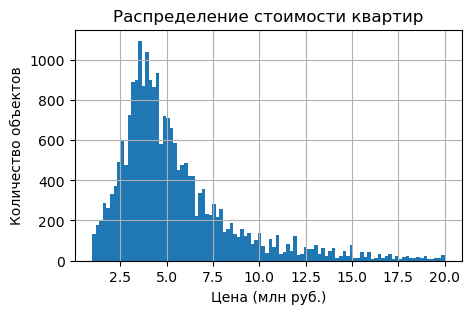

In [81]:
# создаём копию данных и переводим цену в миллионы рублей
data_mln = data.copy()
data_mln['last_price'] = data_mln['last_price'] / 1_000_000


# строим гистограмму распределения цен (в диапазоне от 1 до 20 млн)
data_mln['last_price'].plot(
    kind='hist',
    bins=100,
    grid=True,
    range=(1, 20),
    figsize=(5, 3)
)

plt.xlabel('Цена (млн руб.)')
plt.ylabel('Количество объектов')
plt.title('Распределение стоимости квартир')

plt.show()

In [82]:
data['last_price'].describe()

count       23558.00
mean      6368679.97
std       7710564.12
min        430000.00
25%       3400000.00
50%       4630000.00
75%       6750000.00
max     190870000.00
Name: last_price, dtype: float64

In [83]:
# рассмотрим объекты с ценой ниже 1 млн руб.
data[data['last_price'] < 1_000_000]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,locality_name_clear,metr_price,day,month,year,floor_common,citycenter_km,parks_km,ponds_km,kitchenliving,ceiling_height_new,categorize_price,city_center_km
164,6,800000.00,40.30,2018-06-25,2,NaN,3.00,NaN,1,True,False,False,NaN,2.00,поселок городского типа Ефимовский,NaN,NaN,NaN,NaN,NaN,NaN,81.00,Ефимовский,19851.12,0,6,2018,первый,NaN,NaN,NaN,False,2.65,economy,NaN
247,7,650000.00,31.00,2017-01-20,1,NaN,3.00,NaN,1,True,False,False,NaN,0.00,Сланцы,NaN,NaN,NaN,NaN,NaN,NaN,378.00,Сланцы,20967.74,4,1,2017,первый,NaN,NaN,NaN,False,2.65,economy,NaN
259,6,900000.00,30.00,2017-11-21,1,2.50,5.00,15.00,4,True,False,False,5.00,1.00,Ивангород,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ивангород,30000.00,1,11,2017,другой,NaN,NaN,NaN,False,2.50,economy,NaN
268,7,650000.00,46.00,2018-03-15,2,2.50,5.00,30.00,5,True,False,False,7.00,0.00,Сланцы,NaN,NaN,NaN,NaN,NaN,NaN,75.00,Сланцы,14130.43,3,3,2018,последний,NaN,NaN,NaN,False,2.50,economy,NaN
293,2,900000.00,42.80,2017-06-14,2,NaN,5.00,32.00,5,True,False,False,5.00,0.00,Сясьстрой,NaN,NaN,NaN,NaN,NaN,NaN,247.00,Сясьстрой,21028.04,2,6,2017,последний,NaN,NaN,NaN,False,2.65,economy,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23067,8,600000.00,31.80,2019-04-24,1,NaN,2.00,20.00,1,True,False,False,7.00,0.00,деревня Коркино,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Коркино,18867.92,2,4,2019,первый,NaN,NaN,NaN,False,2.65,economy,NaN
23153,9,650000.00,41.00,2017-10-13,2,NaN,3.00,28.00,1,True,False,False,6.00,0.00,Бокситогорск,NaN,NaN,NaN,NaN,NaN,NaN,14.00,Бокситогорск,15853.66,4,10,2017,первый,NaN,NaN,NaN,False,2.65,economy,NaN
23354,18,900000.00,42.60,2018-02-26,2,NaN,2.00,28.00,1,True,False,False,9.00,0.00,деревня Тихковицы,NaN,NaN,NaN,NaN,NaN,NaN,219.00,Тихковицы,21126.76,0,2,2018,первый,NaN,NaN,NaN,False,2.65,economy,NaN
23484,11,470000.00,44.50,2018-07-02,2,NaN,2.00,28.00,2,True,False,False,7.50,0.00,Сланцы,NaN,NaN,NaN,NaN,NaN,NaN,298.00,Сланцы,10561.80,0,7,2018,последний,NaN,NaN,NaN,False,2.65,economy,NaN


In [84]:
# рассмотрим объекты с ценой ниже 500 тыс руб.
data[data['last_price'] < 500000]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,locality_name_clear,metr_price,day,month,year,floor_common,citycenter_km,parks_km,ponds_km,kitchenliving,ceiling_height_new,categorize_price,city_center_km
5698,7,450000.00,42.00,2017-07-31,2,NaN,1.00,23.00,1,True,False,False,5.80,0.00,городской посёлок Будогощь,NaN,NaN,NaN,NaN,NaN,NaN,233.00,Будогощь,10714.29,0,7,2017,первый,NaN,NaN,NaN,False,2.65,economy,NaN
6859,6,490000.00,40.00,2017-12-11,1,NaN,5.00,NaN,3,True,False,False,NaN,0.00,деревня Старополье,NaN,NaN,NaN,NaN,NaN,NaN,43.00,Старополье,12250.00,0,12,2017,другой,NaN,NaN,NaN,False,2.65,economy,NaN
9581,7,450000.00,43.40,2018-08-31,2,NaN,5.00,30.30,3,True,False,False,5.50,0.00,деревня Старополье,NaN,NaN,NaN,NaN,NaN,NaN,96.00,Старополье,10368.66,4,8,2018,другой,NaN,NaN,NaN,False,2.65,economy,NaN
10782,3,490000.00,29.10,2016-05-05,1,2.50,5.00,17.00,5,True,False,False,5.50,0.00,Сланцы,NaN,NaN,NaN,NaN,NaN,NaN,719.00,Сланцы,16838.49,3,5,2016,последний,NaN,NaN,NaN,False,2.50,economy,NaN
14911,5,430000.00,54.00,2018-06-26,2,NaN,3.00,NaN,3,True,False,False,NaN,0.00,посёлок станции Свирь,NaN,NaN,NaN,NaN,NaN,NaN,44.00,станции Свирь,7962.96,1,6,2018,последний,NaN,NaN,NaN,False,2.65,economy,NaN
16032,8,480000.00,32.00,2019-01-06,1,NaN,2.00,16.00,1,True,False,False,NaN,0.00,Сланцы,NaN,NaN,NaN,NaN,NaN,NaN,83.00,Сланцы,15000.00,6,1,2019,первый,NaN,NaN,NaN,False,2.65,economy,NaN
16219,14,450000.00,38.50,2018-07-11,2,2.65,2.00,NaN,1,True,False,False,NaN,0.00,деревня Вахнова Кара,NaN,NaN,NaN,NaN,NaN,NaN,45.00,Вахнова Кара,11688.31,2,7,2018,первый,NaN,NaN,NaN,False,2.65,economy,NaN
16274,18,440000.00,40.00,2018-07-10,1,NaN,5.00,NaN,1,True,False,False,NaN,0.00,деревня Старополье,NaN,NaN,NaN,NaN,NaN,NaN,45.00,Старополье,11000.00,1,7,2018,первый,NaN,NaN,NaN,False,2.65,economy,NaN
17456,7,430000.00,30.40,2019-04-22,1,NaN,2.00,16.00,1,True,False,False,6.00,0.00,Сланцы,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Сланцы,14144.74,0,4,2019,первый,NaN,NaN,NaN,False,2.65,economy,NaN
17676,0,450000.00,36.50,2018-02-01,1,NaN,5.00,17.30,4,True,False,False,8.50,1.00,деревня Ям-Тесово,NaN,NaN,NaN,NaN,NaN,NaN,120.00,Ям-Тесово,12328.77,3,2,2018,другой,NaN,NaN,NaN,False,2.65,economy,NaN


In [85]:
# удаляем аномально низкое значение цены
data = data[data['last_price'] != data['last_price'].min()]

Исключим объекты с аномально высокой стоимостью (свыше 200 млн руб.), так как экстремальные значения формируют длинный хвост распределения и могут искажать результаты анализа.

Раcсмотрим цену квадратного метра т.к. на общую цену также влияет площадь квартиры и другие факторы.

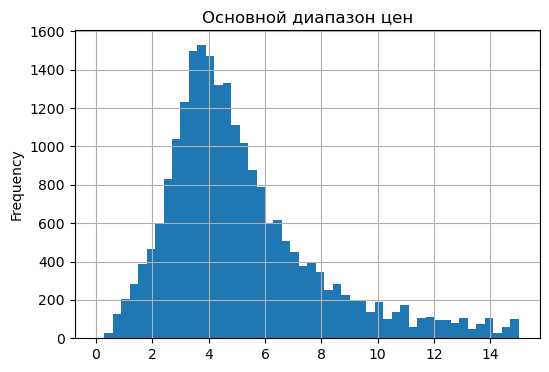

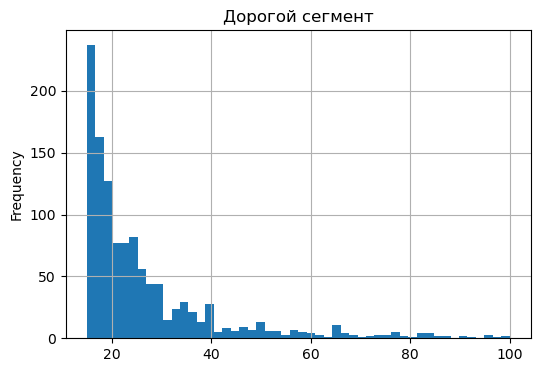

count   23556.00
mean        6.37
std         7.71
min         0.44
25%         3.40
50%         4.63
75%         6.75
max       190.87
Name: last_price, dtype: float64

In [86]:
# исключаем объекты с аномально высокой стоимостью (свыше 200 млн руб.)
data = data.query('last_price <= 200_000_000')

# создаём копию и переводим цену в миллионы рублей для удобства анализа
data_mln = data.copy()
data_mln['last_price'] = data_mln['last_price'] / 1_000_000

# основной рынок
data_mln['last_price'].plot(
    kind='hist',
    bins=50,
    range=(0, 15),
    figsize=(6, 4),
    grid=True
)
plt.title('Основной диапазон цен')
plt.show()

# дорогие квартиры
data_mln['last_price'].plot(
    kind='hist',
    bins=50,
    range=(15, 100),
    figsize=(6, 4),
    grid=True
)
plt.title('Дорогой сегмент')
plt.show()


# анализируем описательную статистику после удаления выбросов
data_mln['last_price'].describe()

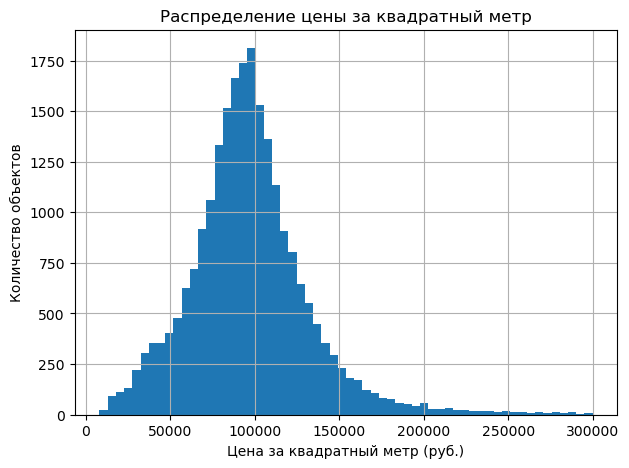

count    23556.00
mean     99037.97
std      45724.01
min       9615.38
25%      76606.28
50%      95000.00
75%     114197.99
max     995983.94
Name: metr_price, dtype: float64

In [87]:
# строим гистограмму распределения цены за квадратный метр
data['metr_price'].plot(
    kind='hist',
    bins=60,
    grid=True,
    range=(8000, 300000),
    figsize=(7, 5)
)

plt.xlabel('Цена за квадратный метр (руб.)')
plt.ylabel('Количество объектов')
plt.title('Распределение цены за квадратный метр')

plt.show()

data['metr_price'].describe()

Разделим объекты на категории в зависимости от цены за квадратный метр:

Luxury — более 250 000 руб.

Premium — от 120 000 до 250 000 руб.

Usual — от 50 000 до 120 000 руб.

Economy — менее 50 000 руб.

In [88]:
def categorize_price(metr):
    if metr <= 50_000:
        return 'economy'
    elif metr <= 120_000:
        return 'standard'
    elif metr <= 250_000:
        return 'premium'
    else:
        return 'luxury'


In [89]:
data['categorize_price'] = data['metr_price'].apply(categorize_price)
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,locality_name_clear,metr_price,day,month,year,floor_common,citycenter_km,parks_km,ponds_km,kitchenliving,ceiling_height_new,categorize_price,city_center_km
0,20,13000000.00,108.00,2019-03-07,3,2.70,16.00,51.00,8,True,False,False,25.00,0.00,Санкт-Петербург,18863.00,16028.00,1.00,482.00,2.00,755.00,NaN,Санкт-Петербург,120370.37,3,3,2019,другой,16.00,0.00,1.00,False,2.70,premium,16.03
1,7,3350000.00,40.40,2018-12-04,1,NaN,11.00,18.60,1,True,False,False,11.00,2.00,посёлок Шушары,12817.00,18603.00,0.00,NaN,0.00,NaN,81.00,Шушары,82920.79,1,12,2018,первый,19.00,NaN,NaN,False,2.65,standard,18.60
2,10,5196000.00,56.00,2015-08-20,2,NaN,5.00,34.30,4,True,False,False,8.30,0.00,Санкт-Петербург,21741.00,13933.00,1.00,90.00,2.00,574.00,558.00,Санкт-Петербург,92785.71,3,8,2015,другой,14.00,0.00,1.00,False,2.65,standard,13.93
3,0,64900000.00,159.00,2015-07-24,3,NaN,14.00,NaN,9,True,False,False,NaN,0.00,Санкт-Петербург,28098.00,6800.00,2.00,84.00,3.00,234.00,424.00,Санкт-Петербург,408176.10,4,7,2015,другой,7.00,0.00,0.00,False,2.65,luxury,6.80
4,2,10000000.00,100.00,2018-06-19,2,3.03,14.00,32.00,13,True,False,False,41.00,0.00,Санкт-Петербург,31856.00,8098.00,2.00,112.00,1.00,48.00,121.00,Санкт-Петербург,100000.00,1,6,2018,другой,8.00,0.00,0.00,False,3.03,standard,8.10
5,10,2890000.00,30.40,2018-09-10,1,NaN,12.00,14.40,5,True,False,False,9.10,0.00,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.00,Янино-1,95065.79,0,9,2018,другой,NaN,NaN,NaN,False,2.65,standard,NaN
6,6,3700000.00,37.30,2017-11-02,1,NaN,26.00,10.60,6,True,False,False,14.40,1.00,посёлок Парголово,52996.00,19143.00,0.00,NaN,0.00,NaN,155.00,Парголово,99195.71,3,11,2017,другой,19.00,NaN,NaN,False,2.65,standard,19.14
7,5,7915000.00,71.60,2019-04-18,2,NaN,24.00,NaN,22,True,False,False,18.90,2.00,Санкт-Петербург,23982.00,11634.00,0.00,NaN,0.00,NaN,NaN,Санкт-Петербург,110544.69,3,4,2019,другой,12.00,NaN,NaN,False,2.65,standard,11.63
8,20,2900000.00,33.16,2018-05-23,1,NaN,27.00,15.43,26,True,False,False,8.81,0.00,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.00,Мурино,87454.76,2,5,2018,другой,NaN,NaN,NaN,False,2.65,standard,NaN
9,18,5400000.00,61.00,2017-02-26,3,2.50,9.00,43.60,7,True,False,False,6.50,2.00,Санкт-Петербург,50898.00,15008.00,0.00,NaN,0.00,NaN,289.00,Санкт-Петербург,88524.59,6,2,2017,другой,15.00,NaN,NaN,False,2.50,standard,15.01


Рассмотрим распределение цены за квадратный метр по выделенным категориям.

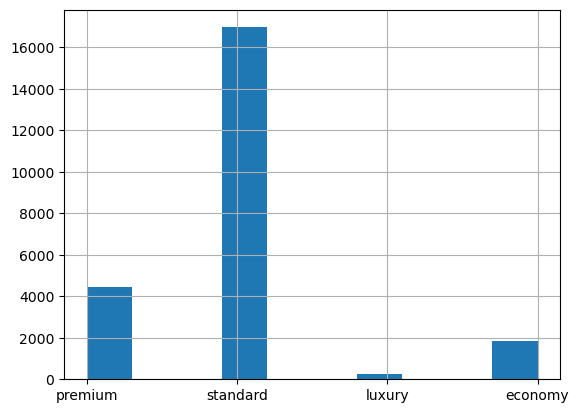

In [90]:
data['categorize_price'].hist();

После анализа цены за квадратный метр рассмотрим распределение площади квартир, так как данный параметр напрямую влияет на стоимость объектов.

### Анализ распределений ключевых параметров

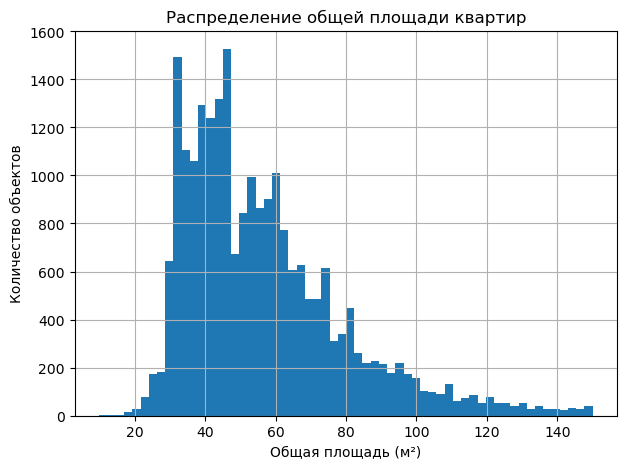

count   23556.00
mean       59.93
std        33.64
min        12.00
25%        40.00
50%        52.00
75%        69.50
max       631.20
Name: total_area, dtype: float64

In [91]:
# строим гистограмму распределения площади (основной диапазон)
data['total_area'].plot(
    kind='hist',
    bins=60,
    grid=True,
    range=(10, 150),
    figsize=(7, 5)
)

plt.xlabel('Общая площадь (м²)')
plt.ylabel('Количество объектов')
plt.title('Распределение общей площади квартир')

plt.show()

data['total_area'].describe()

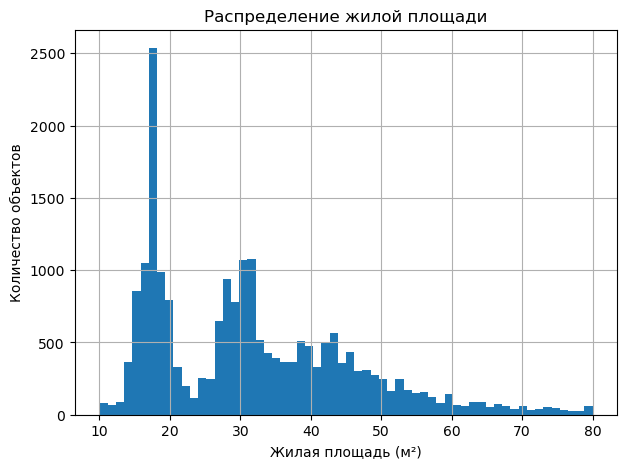

count   21661.00
mean       34.17
std        20.91
min         2.00
25%        18.60
50%        30.00
75%        42.20
max       347.50
Name: living_area, dtype: float64

In [92]:
# строим гистограмму распределения жилой площади (основной диапазон)
data['living_area'].plot(
    kind='hist',
    bins=60,
    grid=True,
    range=(10, 80),
    figsize=(7, 5)
)

plt.xlabel('Жилая площадь (м²)')
plt.ylabel('Количество объектов')
plt.title('Распределение жилой площади')

plt.show()

data['living_area'].describe()

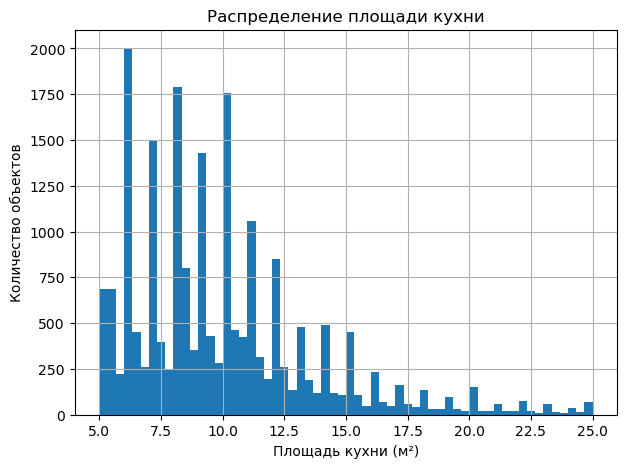

count   21509.00
mean       10.42
std         5.83
min         0.00
25%         7.00
50%         9.00
75%        12.00
max       107.00
Name: kitchen_area, dtype: float64

In [93]:
# строим гистограмму распределения площади кухни (основной диапазон)
data['kitchen_area'].plot(
    kind='hist',
    bins=60,
    grid=True,
    range=(5, 25),
    figsize=(7, 5)
)

plt.xlabel('Площадь кухни (м²)')
plt.ylabel('Количество объектов')
plt.title('Распределение площади кухни')

plt.show()

data['kitchen_area'].describe()

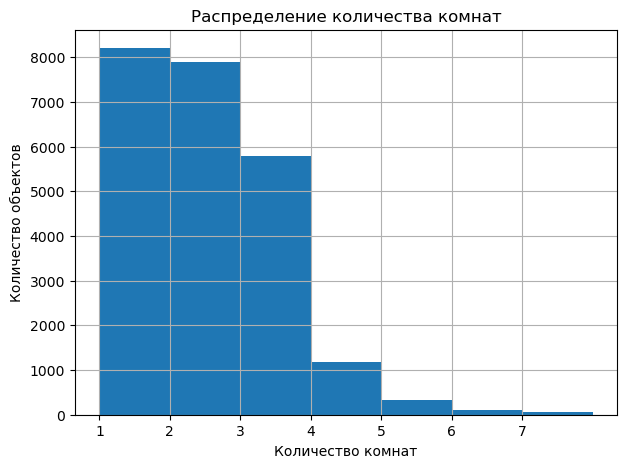

count   23556.00
mean        2.07
std         1.02
min         1.00
25%         1.00
50%         2.00
75%         3.00
max         7.00
Name: rooms, dtype: float64

In [94]:
# строим распределение количества комнат
data['rooms'].plot(
    kind='hist',
    bins=range(int(data['rooms'].min()), int(data['rooms'].max()) + 2),
    grid=True,
    figsize=(7, 5)
)

plt.xlabel('Количество комнат')
plt.ylabel('Количество объектов')
plt.title('Распределение количества комнат')

plt.xticks(range(int(data['rooms'].min()), int(data['rooms'].max()) + 1))  

plt.show()

data['rooms'].describe()

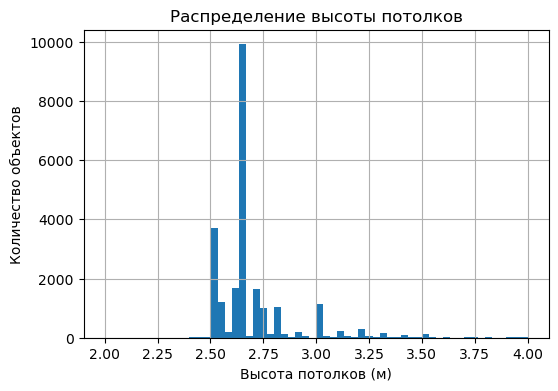

count   23556.00
mean        2.70
std         0.24
min         1.03
25%         2.60
50%         2.65
75%         2.70
max        10.00
Name: ceiling_height_new, dtype: float64

In [95]:
# строим гистограмму распределения высоты потолков (основной диапазон)
data['ceiling_height_new'].plot(
    kind='hist',
    bins=60,
    grid=True,
    range=(2, 4),
    figsize=(6, 4)
)

plt.xlabel('Высота потолков (м)')
plt.ylabel('Количество объектов')
plt.title('Распределение высоты потолков')

plt.show()

data['ceiling_height_new'].describe()

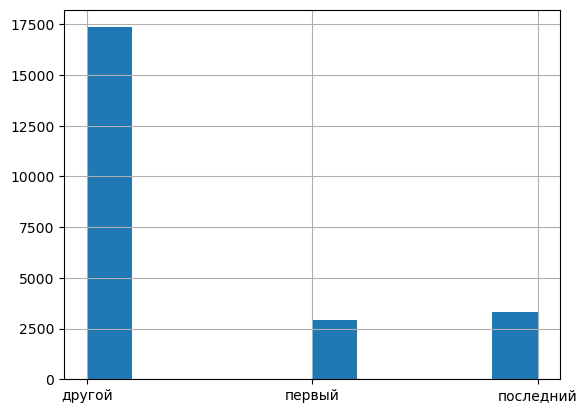

In [96]:
data['floor_common'].hist();

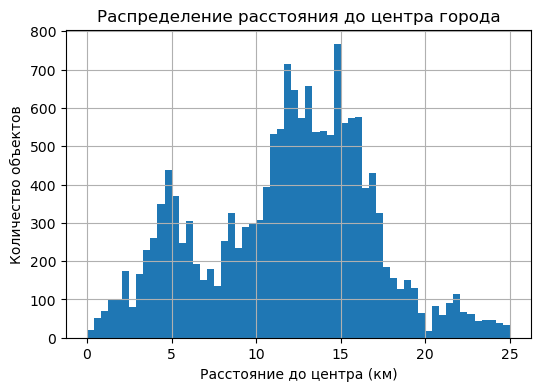

count   18063.00
mean       14.22
std         8.61
min         0.18
25%         9.28
50%        13.11
75%        16.30
max        65.97
Name: city_center_km, dtype: float64

In [97]:
# переводим расстояние до центра в километры
data['city_center_km'] = data['cityCenters_nearest'] / 1000

# строим распределение расстояния до центра (основной диапазон)
data['city_center_km'].plot(
    kind='hist',
    bins=60,
    grid=True,
    range=(0, 25),
    figsize=(6, 4)
)

plt.xlabel('Расстояние до центра (км)')
plt.ylabel('Количество объектов')
plt.title('Распределение расстояния до центра города')

plt.show()

data['city_center_km'].describe()

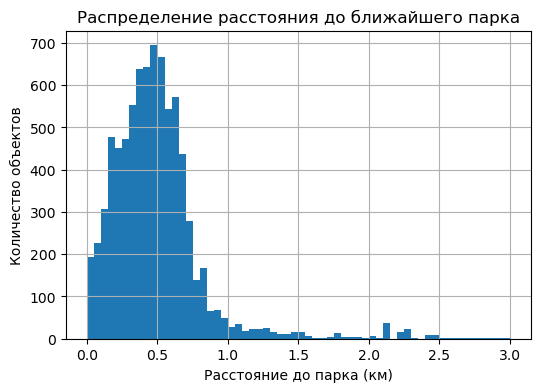

count   8020.00
mean       0.49
std        0.34
min        0.00
25%        0.29
50%        0.46
75%        0.61
max        3.19
Name: parks_km, dtype: float64

In [98]:
# переводим расстояние до ближайшего парка в километры
data['parks_km'] = data['parks_nearest'] / 1000

# строим распределение расстояния до парка
data['parks_km'].plot(
    kind='hist',
    bins=60,
    grid=True,
    range=(0, 3),
    figsize=(6, 4)
)

plt.xlabel('Расстояние до парка (км)')
plt.ylabel('Количество объектов')
plt.title('Распределение расстояния до ближайшего парка')

plt.show()

data['parks_km'].describe()

После анализа характеристик объектов недвижимости перейдём к изучению времени продажи квартир, что позволит оценить динамику рынка и скорость реализации объектов.

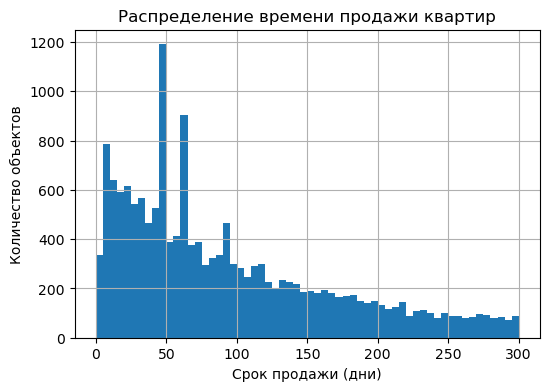

count   20392.00
mean      180.58
std       219.52
min         1.00
25%        45.00
50%        95.00
75%       231.00
max      1580.00
Name: days_exposition, dtype: float64

In [99]:
# строим распределение времени продажи (основной диапазон — до 1 года)
data['days_exposition'].plot(
    kind='hist',
    bins=60,
    grid=True,
    range=(0, 300),
    figsize=(6, 4)
)

plt.xlabel('Срок продажи (дни)')
plt.ylabel('Количество объектов')
plt.title('Распределение времени продажи квартир')

plt.show()

data['days_exposition'].describe()

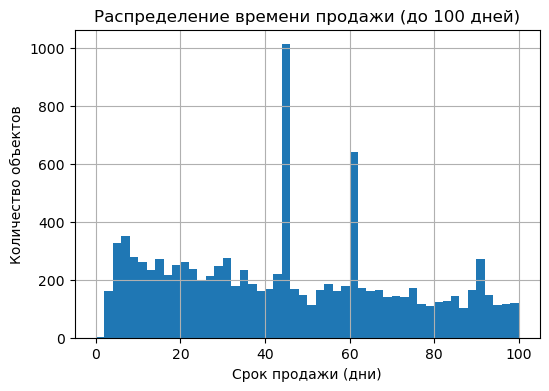

In [100]:
# округляем срок продажи до целых дней
data['days_exposition'] = data['days_exposition'].round()

# анализируем основной диапазон (первые 100 дней)
data.query('days_exposition < 100')['days_exposition'].plot(
    kind='hist',
    bins=50,
    grid=True,
    range=(0, 100),
    figsize=(6, 4)
)

plt.xlabel('Срок продажи (дни)')
plt.ylabel('Количество объектов')
plt.title('Распределение времени продажи (до 100 дней)')

plt.show()

В распределении времени продажи наблюдаются выраженные пики на 45-й и 60-й день. Данные значения, вероятно, связаны с автоматическим снятием объявлений на платформе Яндекс.Недвижимость, а не с фактическим временем продажи объектов.

Таким образом, они не отражают реальную динамику рынка и могут искажать результаты анализа. В связи с этим данные значения будут исключены из дальнейшего рассмотрения.

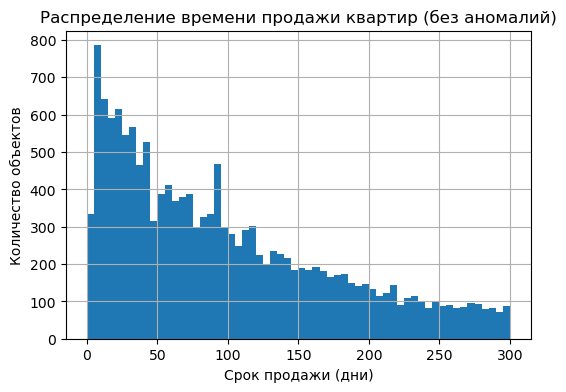

count   15948.00
mean      109.43
std        91.77
min         1.00
25%        34.00
50%        85.00
75%       163.00
max       364.00
Name: days_exposition, dtype: float64

In [101]:
# исключаем значения, связанные с автоматическим снятием объявлений (45 и 60 дней)
# и ограничиваем анализ сроком до 1 года
filtered_for_plot = data[
    (~data['days_exposition'].isin([45, 60])) &
    (data['days_exposition'] < 365)
]

# строим распределение времени продажи
filtered_for_plot['days_exposition'].plot(
    kind='hist',
    bins=60,
    grid=True,
    range=(0, 300),
    figsize=(6, 4)
)

plt.xlabel('Срок продажи (дни)')
plt.ylabel('Количество объектов')
plt.title('Распределение времени продажи квартир (без аномалий)')

plt.show()

filtered_for_plot['days_exposition'].describe()

Вывод:
Медианное время продажи квартиры составляет около 85 дней, что означает, что половина объектов продаётся быстрее этого срока. Среднее значение выше — около 109 дней, что объясняется наличием объектов с длительным периодом продажи.

Квартильный анализ показывает, что:

25% квартир продаются быстрее, чем за 34 дня

75% — в течение 163 дней

Таким образом, можно выделить:

быстрые продажи — до 34 дней

типичный срок продажи — около 2–3 месяцев

длительные продажи — более 5 месяцев

Распределение имеет правостороннюю асимметрию, что указывает на наличие небольшого числа объектов с длительным сроком экспозиции, увеличивающих среднее значение.

### Анализ факторов

После анализа характеристик объектов и времени их продажи перейдём к изучению факторов, влияющих на стоимость квартир. Рассмотрим зависимость цены от площади, количества комнат, наличия балконов, срока экспозиции и расстояния до центра города.

In [102]:
# формируем датасет с ключевыми признаками для анализа
good_data = data[[
    'last_price',
    'total_area',
    'metr_price',
    'living_area',
    'kitchen_area',
    'rooms',
    'balcony',
    'locality_name_clear',
    'days_exposition',
    'day',
    'month',
    'year',
    'floor_common',
    'citycenter_km',
    'categorize_price'
]]

good_data.head()

,last_price,total_area,metr_price,living_area,kitchen_area,rooms,balcony,locality_name_clear,days_exposition,day,month,year,floor_common,citycenter_km,categorize_price
0,13000000.00,108.00,120370.37,51.00,25.00,3,0.00,Санкт-Петербург,NaN,3,3,2019,другой,16.00,premium
1,3350000.00,40.40,82920.79,18.60,11.00,1,2.00,Шушары,81.00,1,12,2018,первый,19.00,standard
2,5196000.00,56.00,92785.71,34.30,8.30,2,0.00,Санкт-Петербург,558.00,3,8,2015,другой,14.00,standard
3,64900000.00,159.00,408176.10,NaN,NaN,3,0.00,Санкт-Петербург,424.00,4,7,2015,другой,7.00,luxury
4,10000000.00,100.00,100000.00,32.00,41.00,2,0.00,Санкт-Петербург,121.00,1,6,2018,другой,8.00,standard


In [103]:
# рассчитываем корреляцию между числовыми признаками
corr_matrix = good_data[[
    'last_price',
    'total_area',
    'living_area',
    'kitchen_area',
    'rooms',
    'balcony',
    'days_exposition',
    'citycenter_km'
]].corr()

corr_matrix

,last_price,total_area,living_area,kitchen_area,rooms,balcony,days_exposition,citycenter_km
last_price,1.00,0.74,0.65,0.56,0.43,0.01,0.12,-0.27
total_area,0.74,1.00,0.94,0.60,0.75,0.02,0.15,-0.23
living_area,0.65,0.94,1.00,0.41,0.85,-0.01,0.14,-0.23
kitchen_area,0.56,0.60,0.41,1.00,0.26,0.04,0.11,-0.19
rooms,0.43,0.75,0.85,0.26,1.00,-0.01,0.12,-0.18
balcony,0.01,0.02,-0.01,0.04,-0.01,1.00,-0.03,0.06
days_exposition,0.12,0.15,0.14,0.11,0.12,-0.03,1.00,-0.06
citycenter_km,-0.27,-0.23,-0.23,-0.19,-0.18,0.06,-0.06,1.00


Вывод: 
Наибольшая зависимость цены квартиры наблюдается от общей площади (коэффициент корреляции 0.74), что указывает на ключевую роль данного параметра в формировании стоимости. Также заметная положительная связь прослеживается с жилой площадью (0.66) и площадью кухни (0.56).

Количество комнат имеет умеренную корреляцию с ценой (0.44), что объясняется тем, что данный показатель косвенно связан с площадью квартиры.

Влияние расстояния до центра отрицательное (-0.27): чем дальше объект расположен от центра, тем ниже его стоимость.

При этом количество балконов (0.01) и срок экспозиции (0.12) практически не влияют на цену квартиры.

Таким образом, ключевым фактором стоимости недвижимости является площадь объекта, тогда как дополнительные характеристики оказывают значительно меньшее влияние.

было установлено, что наибольшее влияние на цену квартиры оказывает её площадь. Для более детального анализа рассмотрим зависимость цены от различных типов площади: общей, жилой и кухонной.

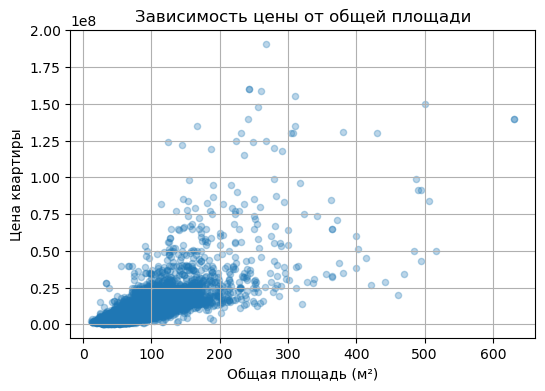

In [104]:
good_data.plot(
    x='total_area',
    y='last_price',
    kind='scatter',
    grid=True,
    figsize=(6, 4),
    alpha=0.3
)

plt.xlabel('Общая площадь (м²)')
plt.ylabel('Цена квартиры')
plt.title('Зависимость цены от общей площади')

plt.show()

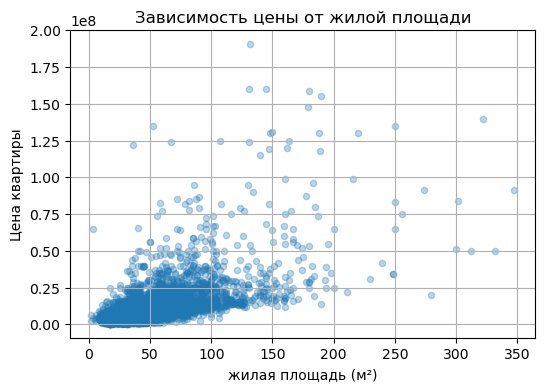

In [105]:
good_data.plot(
    x='living_area',
    y='last_price',
    kind='scatter',
    grid=True,
    figsize=(6, 4),
    alpha=0.3
)

plt.xlabel('жилая площадь (м²)')
plt.ylabel('Цена квартиры')
plt.title('Зависимость цены от жилой площади')

plt.show()

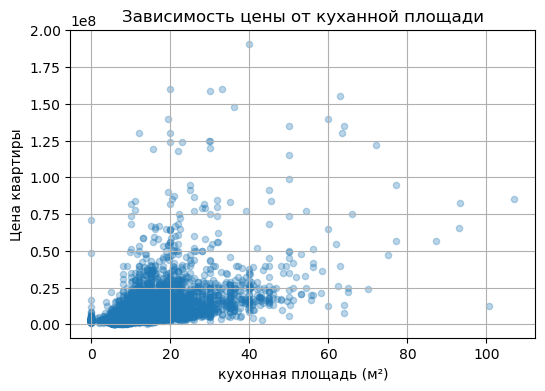

In [106]:

good_data.plot(
    x='kitchen_area',
    y='last_price',
    kind='scatter',
    grid=True,
    figsize=(6, 4),
    alpha=0.3
)

plt.xlabel('кухонная площадь (м²)')
plt.ylabel('Цена квартиры')
plt.title('Зависимость цены от куханной площади')

plt.show()

а графиках наблюдается прямая зависимость между ценой квартиры и её площадью: с увеличением площади стоимость объекта, как правило, растёт.

Наиболее сильная зависимость прослеживается для общей площади, что подтверждается и коэффициентом корреляции. Жилая площадь также оказывает значительное влияние, тогда как влияние площади кухни выражено слабее.

При этом заметен разброс значений: для квартир с одинаковой площадью цена может существенно различаться, что указывает на влияние других факторов (локация, состояние, этаж и др.).

Рассмотрим графически зависимость цены квартиры от количества комнат, чтобы оценить, как изменение планировки влияет на стоимость объекта.

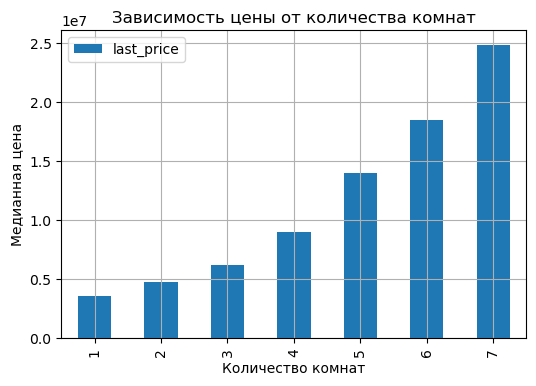

In [107]:

good_data.pivot_table(
    index='rooms',
    values='last_price',
    aggfunc='median'
).plot(
    kind='bar',
    grid=True,
    figsize=(6, 4)
)

plt.xlabel('Количество комнат')
plt.ylabel('Медианная цена')
plt.title('Зависимость цены от количества комнат')

plt.show()

Наблюдается зависимость цены от количества комнат: с увеличением числа комнат цена квартиры, как правило, растёт.

Рассмотрим граффически зависимости цены от этажа квартиры:

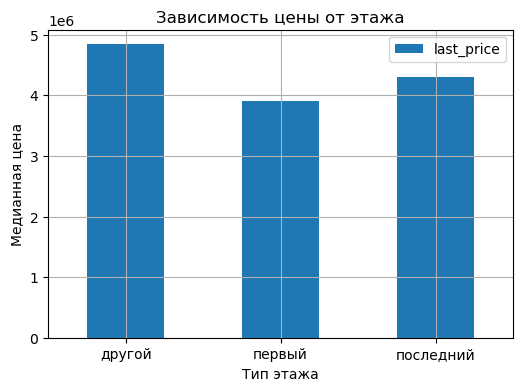

In [108]:
good_data.pivot_table(
    index='floor_common',
    values='last_price',
    aggfunc='median'
).plot(
    kind='bar',
    grid=True,
    figsize=(6, 4)
)

plt.xlabel('Тип этажа')
plt.ylabel('Медианная цена')
plt.title('Зависимость цены от этажа')

plt.xticks(rotation=0)

plt.show()

Можно отметить, что квартиры на первом этаже, как правило, имеют более низкую стоимость по сравнению с другими вариантами.

При этом следует учитывать, что объявлений с квартирами на первом этаже значительно меньше, чем с квартирами на других этажах, что может влиять на устойчивость полученных оценок.

Рассмотрим графически зависимость цены квартиры от дня, месяца и года размещения объявления.

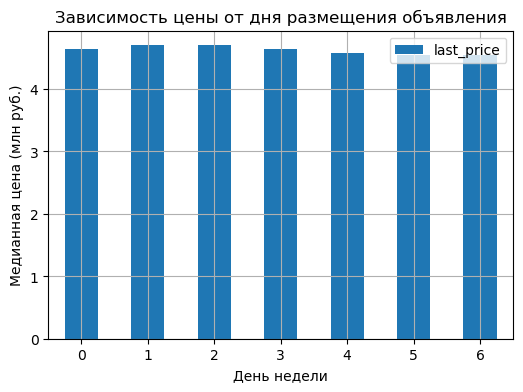

In [116]:
(good_data.pivot_table(index='day', values='last_price', aggfunc='median') / 1_000_000).plot(
    kind='bar', grid=True, figsize=(6, 4)
)

plt.xlabel('День недели')
plt.ylabel('Медианная цена (млн руб.)')
plt.title('Зависимость цены от дня размещения объявления')
plt.xticks(rotation=0)
plt.show()

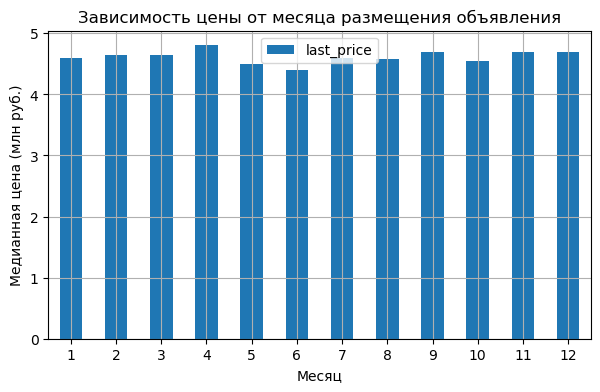

In [114]:
(good_data.pivot_table(index='month', values='last_price', aggfunc='median') / 1_000_000).plot(
    kind='bar',
    grid=True,
    figsize=(7, 4)
)

plt.xlabel('Месяц')
plt.ylabel('Медианная цена (млн руб.)')
plt.title('Зависимость цены от месяца размещения объявления')

plt.xticks(rotation=0)
plt.show()

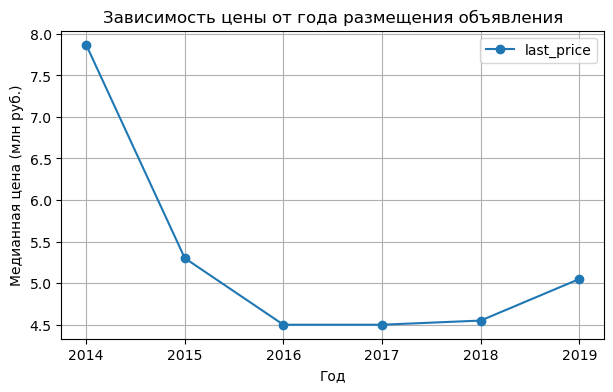

In [115]:
(good_data.pivot_table(index='year', values='last_price', aggfunc='median') / 1_000_000).plot(
    kind='line',
    marker='o',
    grid=True,
    figsize=(7, 4)
)

plt.xlabel('Год')
plt.ylabel('Медианная цена (млн руб.)')
plt.title('Зависимость цены от года размещения объявления')

plt.show()

Вывод:
Зависимость цены квартиры от даты размещения объявления выражена слабо.

По дням недели медианная цена практически не меняется — колебания незначительны, явной закономерности нет.

По месяцам также не наблюдается существенных различий: цены остаются примерно на одном уровне в течение года.

По годам заметна динамика: после снижения цен в 2015–2016 годах наблюдается постепенный рост к 2019 году.

Таким образом, можно сделать вывод, что дата размещения объявления (день и месяц) практически не влияет на цену, в отличие от года, где прослеживается общий рыночный тренд.

После анализа основных характеристик квартир и факторов, влияющих на цену, рассмотрим влияние географического расположения. В частности, изучим населённые пункты с наибольшим количеством объявлений и сравним среднюю стоимость квартир в них. Это позволит выявить различия в уровне цен в зависимости от локации.

In [60]:
place_countprice = good_data.pivot_table(index='locality_name_clear', values='metr_price', aggfunc=['count', 'mean'])
place_countprice.columns = ['count','mean']
place_countprice = place_countprice.sort_values(by='count', ascending=False).head(10)
place_countprice


,count,mean
locality_name_clear,,
Санкт-Петербург,15679,114329.58
Мурино,587,86011.39
Кудрово,472,95324.93
Шушары,439,78673.30
Всеволожск,395,68541.65
Пушкин,369,103125.82
Колпино,337,75480.55
Парголово,326,90135.08
Гатчина,305,68675.76


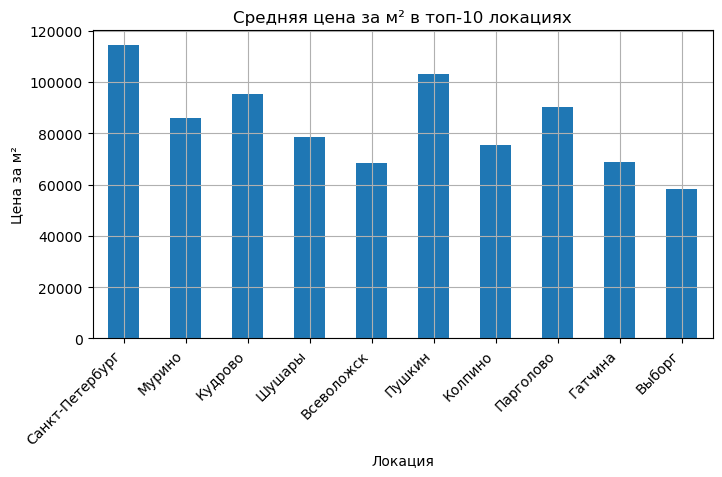

In [129]:
place_countprice = good_data.pivot_table(
    index='locality_name_clear',
    values='metr_price',
    aggfunc=['count', 'mean']
)

place_countprice.columns = ['count', 'mean']

place_countprice = (
    place_countprice
    .sort_values(by='count', ascending=False)
    .head(10)
)

# bar plot по средней цене
place_countprice['mean'].plot(
    kind='bar',
    figsize=(8, 4),
    grid=True
)

plt.title('Средняя цена за м² в топ-10 локациях')
plt.xlabel('Локация')
plt.ylabel('Цена за м²')
plt.xticks(rotation=45, ha='right')

plt.show()


Вывод:
Наибольшее количество объявлений приходится на Санкт-Петербург — он значительно опережает остальные населённые пункты по объёму рынка. При этом здесь же наблюдается и самая высокая средняя цена за квадратный метр (~114 тыс. руб.).

Среди пригородов и небольших городов цены заметно ниже, однако есть различия: например, Пушкин и Кудрово выделяются более высокой стоимостью (103 тыс. и 95 тыс. руб. соответственно), тогда как Выборг и Всеволожск относятся к более доступным локациям (58–69 тыс. руб.).

В целом прослеживается закономерность: чем ближе населённый пункт к крупному городу (Санкт-Петербургу), тем выше цена за квадратный метр.

После анализа цен по различным населённым пунктам логично отдельно рассмотреть крупнейший рынок — Санкт-Петербург.
Интересно понять, как внутри города меняется стоимость недвижимости в зависимости от удалённости от центра.

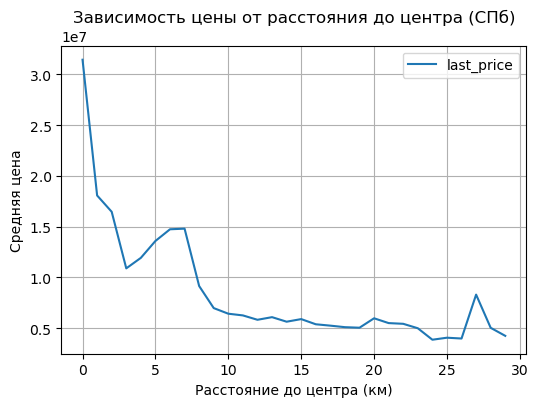

In [118]:
spb = good_data.query('locality_name_clear == "Санкт-Петербург"').copy()

spb['citycenterkm_round'] = spb['citycenter_km'].round()

Spbkmcenter = spb.pivot_table(
    index='citycenterkm_round',
    values='last_price',
    aggfunc='mean'
)

Spbkmcenter.plot(grid=True, figsize=(6,4))

plt.xlabel('Расстояние до центра (км)')
plt.ylabel('Средняя цена')
plt.title('Зависимость цены от расстояния до центра (СПб)')

plt.show()

Вывод:
В Санкт-Петербурге наблюдается выраженная зависимость цены квартиры от расстояния до центра. Самые высокие цены сосредоточены вблизи центра (до 2–3 км).

С увеличением расстояния стоимость жилья заметно снижается, особенно в диапазоне до 10 км. После этого снижение становится более плавным, и цены стабилизируются.

Небольшие всплески на графике могут быть связаны с особенностями отдельных районов или меньшим количеством объявлений на этих расстояниях.

### общий вывод

В ходе анализа данных о продаже квартир были изучены основные характеристики объектов недвижимости, распределения ключевых параметров и факторы, влияющие на цену.

На этапе предобработки данных были устранены выбросы (аномально дорогие квартиры, экстремальные значения сроков продажи, редкие значения количества комнат), что позволило сделать анализ более корректным. Также были выявлены пропуски, однако их доля оказалась некритичной для большинства признаков.

Анализ распределений показал, что:

- Большинство квартир имеют умеренную стоимость, а распределение цен имеет правый «хвост» за счёт дорогих объектов

- Цена за квадратный метр сосредоточена в диапазоне примерно 70–120 тыс. руб., что соответствует основному сегменту рынка

- Основная масса квартир имеет площадь до 100 м², 1–3 комнаты и стандартные значения параметров (кухня, потолки и т.д.)

Исследование времени продажи показало, что:

- Большинство квартир продаётся в течение ~1–3 месяцев

- Быстрые продажи происходят до ~30–40 дней

- Значения 45 и 60 дней являются техническими (снятие объявлений), поэтому были исключены

При анализе факторов, влияющих на цену, установлено:

- Наибольшее влияние оказывает общая площадь квартиры

- Также значимы жилая и кухонная площадь и количество комнат

- Практически отсутствует влияние количества балконов и срока размещения объявления

- Наблюдается отрицательная зависимость цены от расстояния до центра

Дополнительный анализ показал:

- Цена растёт с увеличением количества комнат 

- Квартиры на первом этаже стоят дешевле

- День и месяц размещения практически не влияют на цену

- По годам наблюдается изменение цен, отражающее динамику рынка

При сравнении населённых пунктов:

- Самая высокая цена за м² — в Санкт-Петербурге

- Близлежащие города (Пушкин, Кудрово, Парголово) также имеют высокие значения

- Более удалённые населённые пункты (Гатчина, Выборг) значительно дешевле

Отдельно по Санкт-Петербургу:

- Цена резко снижается с увеличением расстояния от центра

- Наиболее дорогая недвижимость расположена в радиусе до 3–5 км

Итог

Таким образом, ключевыми факторами, определяющими стоимость квартиры, являются:
- площадь
- количество комнат
- расположение (особенно расстояние до центра)